[View in Colaboratory](https://colab.research.google.com/github/stanimman/Pneumonia-Detection/blob/master/TF_DataSet-recorder_Not_implemented.ipynb)

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [1]:
!pip uninstall Pillow -y

!pip install Pillow

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 12.0MB/s 


In [2]:
!pip install -q kaggle-cli
!kg download -u 'stanimman' -p 'Legspinner@1' -c 'rsna-pneumonia-detection-challenge'
!git clone https://github.com/stanimman/Pneumonia-Detection.git

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/download/GCP%20Credits%20Request%20Link%20-%20RSNA.txt

GCP%20Credits%20Request%20Link%20-%20RSNA.txt 100% |###| Time: 0:00:00 120.9 B/s

downloading https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/download/stage_1_detailed_class_info.csv

stage_1_detailed_class_info.csv 100% |###########

In [0]:
!unzip -q -o stage_1_train_images.zip -d stage_1_train_images # Need to understand what is the various argument that is passed on

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import numpy as np
import sys
import os
import pandas as pd
from PIL import Image
#import knifey

In [0]:
# install dependencies not included by Colab# insta 
# use pip3 to ensure compatibility w/ Google Deep Learning Images 
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug

In [0]:
import os 
import sys

import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob

In [0]:
stage_1_df = pd.read_csv('Pneumonia-Detection/stage_1_train_labels.csv')

In [0]:
#import random
stage_1_df['path'] = 'stage_1_train_images/'+stage_1_df['patientId']+'.dcm'
#random_number_list = random.sample(range(0, 28988), 5000)
#stage_1_test_labels_df = stage_1_train_labels_df.iloc[random_number_list,:]

In [0]:
Pnumenoia_Case = stage_1_df[stage_1_df.Target == 1]
Non_Pnumenoia_Case = stage_1_df[stage_1_df.Target == 0]
stage_1_train_labels_df = pd.concat([Pnumenoia_Case.iloc[range(850),:],(Non_Pnumenoia_Case.iloc[range(1500),:])])
stage_1_test_labels_df = pd.concat([Pnumenoia_Case.iloc[851:896,:],(Non_Pnumenoia_Case.iloc[1501:1551,:])])


In [9]:
stage_1_train_labels_df.head()

,patientId,x,y,width,height,Target,path
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,stage_1_train_images/00436515-870c-4b36-a041-d...
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,stage_1_train_images/00436515-870c-4b36-a041-d...
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,stage_1_train_images/00704310-78a8-4b38-8475-4...
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,stage_1_train_images/00704310-78a8-4b38-8475-4...
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1,stage_1_train_images/00aecb01-a116-45a2-956c-0...


In [10]:
print(stage_1_train_labels_df.Target.value_counts())
print(stage_1_test_labels_df.Target.value_counts())

0    1500
1     850
Name: Target, dtype: int64
0    50
1    45
Name: Target, dtype: int64


In [11]:
ds = pydicom.dcmread('stage_1_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm')
image = ds.pixel_array
image = np.stack((image,)*3,-1)
print(image.shape)

(1024, 1024, 3)


In [0]:
print(image)

In [12]:
path_tfrecords_train = os.path.join('Pneumonia-Detection', "train.tfrecords")
path_tfrecords_train

'Pneumonia-Detection/train.tfrecords'

In [13]:
path_tfrecords_test = os.path.join('Pneumonia-Detection', "test.tfrecords")
path_tfrecords_test

'Pneumonia-Detection/test.tfrecords'

In [0]:
def print_progress(count, total):
    # Percentage completion.
    pct_complete = float(count) / total

    # Status-message.
    # Note the \r which means the line should overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [0]:
def wrap_int64(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [0]:
def wrap_bytes(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [0]:
image_paths_train = stage_1_train_labels_df.iloc[:,6].tolist()
cls_train = stage_1_train_labels_df.iloc[:,5].tolist()

In [0]:
image_paths_test = stage_1_test_labels_df.iloc[:,6].tolist()
cls_test = stage_1_test_labels_df.iloc[:,5].tolist()

In [19]:
image_paths_test[0]

'stage_1_train_images/1f45c8c0-4475-45e9-85e5-0cf139d0572b.dcm'

In [0]:
def convert(image_paths, labels, out_path):
    # Args:
    # image_paths   List of file-paths for the images.
    # labels        Class-labels for the images.
    # out_path      File-path for the TFRecords output file.
    
    print("Converting: " + out_path)
    
    # Number of images. Used when printing the progress.
    num_images = len(image_paths)
    
    # Open a TFRecordWriter for the output-file.
    with tf.python_io.TFRecordWriter(out_path) as writer:
        
        # Iterate over all the image-paths and class-labels.
        for i, (path, label) in enumerate(zip(image_paths, labels)):
            # Print the percentage-progress.
            print_progress(count=i, total=num_images-1)

            # Load the image-file using matplotlib's imread function.
            #img = imread(path)
            ds = pydicom.dcmread(path)
            img = ds.pixel_array
            img = np.stack((img,)*3,-1)
            #print(image.shape)
            
            # Convert the image to raw bytes.
            img_bytes = img.tostring()

            # Create a dict with the data we want to save in the
            # TFRecords file. You can add more relevant data here.
            data = \
                {
                    'image': wrap_bytes(img_bytes),
                    'label': wrap_int64(label)
                }

            # Wrap the data as TensorFlow Features.
            feature = tf.train.Features(feature=data)

            # Wrap again as a TensorFlow Example.
            example = tf.train.Example(features=feature)

            # Serialize the data.
            serialized = example.SerializeToString()
            
            # Write the serialized data to the TFRecords file.
            writer.write(serialized)

In [21]:
convert(image_paths=image_paths_train,
        labels=cls_train,
        out_path=path_tfrecords_train)

Converting: Pneumonia-Detection/train.tfrecords
- Progress: 100.0%

In [22]:
convert(image_paths=image_paths_test,
        labels=cls_test,
        out_path=path_tfrecords_test)

Converting: Pneumonia-Detection/test.tfrecords
- Progress: 100.0%

In [23]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
TPU_WORKER

'grpc://10.55.187.10:8470'

In [0]:
tpu = TPU_WORKER
gcp_project = 'tpu_exp'
batch_size = 128
learning_rate = 0.05
train_steps = 100000
use_tpu = True
model_dir = 'MyDir'
iterations_per_loop = 100
num_shards = 8

In [0]:
def model_fn(features, labels, mode, params):
  """Define a CIFAR model in Keras."""
  del params  # unused
  layers = tf.contrib.keras.layers

  # Pass our input tensor to initialize the Keras input layer.
  v = layers.Input(tensor=features)
  v = layers.Conv2D(filters=32, kernel_size=5,
                    activation="relu", padding="same")(v)
  v = layers.MaxPool2D(pool_size=2)(v)
  v = layers.Conv2D(filters=64, kernel_size=5,
                    activation="relu", padding="same")(v)
  v = layers.MaxPool2D(pool_size=2)(v)
  v = layers.Flatten()(v)
  fc1 = layers.Dense(units=512, activation="relu")(v)
  logits = layers.Dense(units=2)(fc1)

  # Instead of constructing a Keras model for training, build our loss function
  # and optimizer in Tensorflow.
  #
  # N.B.  This construction omits some features that are important for more
  # complex models (e.g. regularization, batch-norm).  Once
  # `model_to_estimator` support is added for TPUs, it should be used instead.
  loss = tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels
      )
  )
  optimizer = tf.train.AdamOptimizer()
  if use_tpu:
    optimizer = tf.contrib.tpu.CrossShardOptimizer(optimizer)

  train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())

  return tf.contrib.tpu.TPUEstimatorSpec(
      mode=mode,
      loss=loss,
      train_op=train_op,
      predictions={
          "classes": tf.argmax(input=logits, axis=1),
          "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
      }
  )

In [0]:
def input_fn(params):
  """Read CIFAR input data from a TFRecord dataset."""
  del params
  batch_size = 128
  train_file = 'Pneumonia-Detection/train.tfrecords'
  def parser(serialized_example):
    """Parses a single tf.Example into image and label tensors."""
    features = tf.parse_single_example(
        serialized_example,
        features={
            "image": tf.FixedLenFeature([], tf.string),
            "label": tf.FixedLenFeature([], tf.int64),
        })
    image = tf.decode_raw(features["image"], tf.uint8)
    image.set_shape([3*32*32])
    image = tf.cast(image, tf.float32) * (1. / 255) - 0.5
    image = tf.transpose(tf.reshape(image, [3, 32, 32]))
    label = tf.cast(features["label"], tf.int32)
    return image, label

  dataset = tf.data.TFRecordDataset([train_file])
  dataset = dataset.map(parser, num_parallel_calls=batch_size)
  dataset = dataset.prefetch(4 * batch_size).cache().repeat()
  dataset = dataset.apply(
      tf.contrib.data.batch_and_drop_remainder(batch_size)
  )
  dataset = dataset.prefetch(1)
  return dataset

In [0]:
tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(
      tpu,
      project= gcp_project)

run_config = tf.contrib.tpu.RunConfig(
      cluster=tpu_cluster_resolver,
      #model_dir = '/Pneumonia-Detection',
      save_checkpoints_secs=3600,
      session_config=tf.ConfigProto(
          allow_soft_placement=True, log_device_placement=True),
      tpu_config=tf.contrib.tpu.TPUConfig(
          iterations_per_loop=iterations_per_loop,
          num_shards=num_shards),
  )

  

In [44]:
estimator = tf.contrib.tpu.TPUEstimator(
      model_fn=model_fn,
      use_tpu= use_tpu,
      config=run_config,
      train_batch_size= batch_size)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmzvm3lgs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 3600, '_session_config': allow_soft_placement: true
log_device_placement: true
cluster_def {
  job {
    name: "worker"
    tasks {
      value: "10.55.187.10:8470"
    }
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8ac80174a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': b'grpc://10.55.187.10:8470', '_evaluation_master': b'grpc://10.55.187.10:8470', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_tpu_config': TPUConfig(iterations_per_loop=100, num_shards=8, num_cores_per_r

In [45]:
estimator.train(input_fn=input_fn, max_steps=train_steps)

INFO:tensorflow:Querying Tensorflow master (b'grpc://10.55.187.10:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 656491828873089236)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 16143568905366491705)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 9000698506957066683)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10801824659740258392)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 9464786048293367700)
INFO:tensorflow:*** Available Device: _DeviceA

UnimplementedError: ignored

In [0]:
# Cloud TPU Cluster Resolvers
flags.DEFINE_string(
    'tpu', 'grpc://10.23.169.218:8470',
    help='The Cloud TPU to use for training. This should be either the name '
    'used when creating the Cloud TPU, or a grpc://ip.address.of.tpu:8470 url.')
flags.DEFINE_string(
    "gcp_project", 'tpu_exp',
    help="Project name for the Cloud TPU-enabled project. If not specified, we "
    "will attempt to automatically detect the GCE project from metadata.")
flags.DEFINE_string(
    "tpu_zone", default=None,
    help="GCE zone where the Cloud TPU is located in. If not specified, we "
    "will attempt to automatically detect the GCE project from metadata.")

# Model specific paramenters
flags.DEFINE_integer("batch_size", 128,
                     "Mini-batch size for the computation. Note that this "
                     "is the global batch size and not the per-shard batch.")
flags.DEFINE_float("learning_rate", 0.05, "Learning rate.")
flags.DEFINE_string("train_file", "XR_FOREARM/train.tfrecords", "Path to cifar10 training data.")
flags.DEFINE_integer("train_steps", 100000,
                     "Total number of steps. Note that the actual number of "
                     "steps is the next multiple of --iterations greater "
                     "than this value.")
flags.DEFINE_bool("use_tpu", True, "Use TPUs rather than plain CPUs")
flags.DEFINE_string("model_dir", 'XR_FOREARM', "Estimator model_dir")
flags.DEFINE_string("logtostderr", 'Warning', "Estimator model_dir")
flags.DEFINE_integer("iterations_per_loop", 100,
                     "Number of iterations per TPU training loop.")
flags.DEFINE_integer("num_shards", 8, "Number of shards (TPU chips).")


FLAGS = flags.FLAGS

In [0]:
def input_fn(filenames,params,train, batch_size=32, buffer_size=2048):
    # Args:
    # filenames:   Filenames for the TFRecords files.
    # train:       Boolean whether training (True) or testing (False).
    # batch_size:  Return batches of this size.
    # buffer_size: Read buffers of this size. The random shuffling
    #              is done on the buffer, so it must be big enough.

    # Create a TensorFlow Dataset-object which has functionality
    # for reading and shuffling data from TFRecords files.
    dataset = tf.data.TFRecordDataset(filenames=filenames)

    # Parse the serialized data in the TFRecords files.
    # This returns TensorFlow tensors for the image and labels.
    dataset = dataset.map(parse)

    if train:
        # If training then read a buffer of the given size and
        # randomly shuffle it.
        dataset = dataset.shuffle(buffer_size=buffer_size)

        # Allow infinite reading of the data.
        num_repeat = None
    else:
        # If testing then don't shuffle the data.
        
        # Only go through the data once.
        num_repeat = 1

    # Repeat the dataset the given number of times.
    dataset = dataset.repeat(num_repeat)
    
    # Get a batch of data with the given size.
    dataset = dataset.batch(batch_size)

    # Create an iterator for the dataset and the above modifications.
    iterator = dataset.make_one_shot_iterator()

    # Get the next batch of images and labels.
    images_batch, labels_batch = iterator.get_next()

    # The input-function must return a dict wrapping the images.
    x = {'image': images_batch}
    y = labels_batch

    return x, y

In [0]:
def train_input_fn():
    return input_fn(filenames=path_tfrecords_train, train=True)

In [28]:
path_tfrecords_train

'XR_FOREARM/train.tfrecords'

In [0]:
def test_input_fn():
    return input_fn(filenames=path_tfrecords_test, train=False)

In [0]:
def load_images(image_paths):
    # Load the images from disk.
    #images = [imread(path) for path in image_paths]
    for path in image_paths:
      ds = pydicom.dcmread(path)
      images = ds.pixel_array
      images = np.stack((images,)*3,-1)

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [0]:
some_images = load_images(image_paths=image_paths_test[0:9])

In [0]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"image": some_images.astype(np.float32)},
    num_epochs=1,
    shuffle=False)

In [0]:
some_images_cls = cls_test[0:9]

In [23]:
image.shape

(1024, 1024, 3)

In [0]:
feature_image = tf.feature_column.numeric_column("image",
                                                 shape=image.shape)

In [0]:
feature_columns = [feature_image]

In [0]:
num_hidden_units = [512, 256, 128]

In [27]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                   hidden_units=num_hidden_units,
                                   activation_fn=tf.nn.relu,
                                   n_classes=2,
                                   model_dir="XR_FOREARM/New")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'XR_FOREARM/New', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7ea2353908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [1]:
model.train(input_fn=train_input_fn, steps=20)

NameError: ignored

In [1]:
result = model.evaluate(input_fn=test_input_fn)

NameError: ignored

In [57]:
!pip uninstall flags -y

Skipping flags as it is not installed.


In [0]:
def model_fn(features, labels, mode, params):
    # Args:
    #
    # features: This is the x-arg from the input_fn.
    # labels:   This is the y-arg from the input_fn.
    # mode:     Either TRAIN, EVAL, or PREDICT
    # params:   User-defined hyper-parameters, e.g. learning-rate.
    
    # Reference to the tensor named "image" in the input-function.
    x = features["image"]

    # The convolutional layers expect 4-rank tensors
    # but x is a 2-rank tensor, so reshape it.
    net = tf.reshape(x, [-1, img_size, img_size, num_channels])    

    # First convolutional layer.
    net = tf.layers.conv2d(inputs=net, name='layer_conv1',
                           filters=32, kernel_size=3,
                           padding='same', activation=tf.nn.relu)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

    # Second convolutional layer.
    net = tf.layers.conv2d(inputs=net, name='layer_conv2',
                           filters=32, kernel_size=3,
                           padding='same', activation=tf.nn.relu)
    net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)    

    # Flatten to a 2-rank tensor.
    net = tf.contrib.layers.flatten(net)
    # Eventually this should be replaced with:
    # net = tf.layers.flatten(net)

    # First fully-connected / dense layer.
    # This uses the ReLU activation function.
    net = tf.layers.dense(inputs=net, name='layer_fc1',
                          units=128, activation=tf.nn.relu)    

    # Second fully-connected / dense layer.
    # This is the last layer so it does not use an activation function.
    net = tf.layers.dense(inputs=net, name='layer_fc_2',
                          units=2)

    # Logits output of the neural network.
    logits = net

    # Softmax output of the neural network.
    y_pred = tf.nn.softmax(logits=logits)
    
    # Classification output of the neural network.
    y_pred_cls = tf.argmax(y_pred, axis=1)

    if mode == tf.estimator.ModeKeys.PREDICT:
        # If the estimator is supposed to be in prediction-mode
        # then use the predicted class-number that is output by
        # the neural network. Optimization etc. is not needed.
        spec = tf.estimator.EstimatorSpec(mode=mode,
                                          predictions=y_pred_cls)
    else:
        # Otherwise the estimator is supposed to be in either
        # training or evaluation-mode. Note that the loss-function
        # is also required in Evaluation mode.
        
        # Define the loss-function to be optimized, by first
        # calculating the cross-entropy between the output of
        # the neural network and the true labels for the input data.
        # This gives the cross-entropy for each image in the batch.
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels,
                                                                       logits=logits)

        # Reduce the cross-entropy batch-tensor to a single number
        # which can be used in optimization of the neural network.
        loss = tf.reduce_mean(cross_entropy)

        # Define the optimizer for improving the neural network.
        optimizer = tf.train.AdamOptimizer(learning_rate=params["learning_rate"])

        # Get the TensorFlow op for doing a single optimization step.
        train_op = optimizer.minimize(
            loss=loss, global_step=tf.train.get_global_step())

        # Define the evaluation metrics,
        # in this case the classification accuracy.
        metrics = \
        {
            "accuracy": tf.metrics.accuracy(labels, y_pred_cls)
        }

        # Wrap all of this in an EstimatorSpec.
        spec = tf.estimator.EstimatorSpec(
            mode=mode,
            loss=loss,
            train_op=train_op,
            eval_metric_ops=metrics)
        
    return spec

In [0]:
params = {"learning_rate": 1e-4}

In [25]:
model = tf.estimator.Estimator(model_fn=model_fn,
                               params=params,
                               use_tpu=True,
                               model_dir="XR_FOREARM/New")

TypeError: ignored

In [26]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
TPU_WORKER

'grpc://10.71.10.34:8470'

In [0]:
tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(
      'grpc://10.71.10.34:8470'
      )


In [0]:
run_config = tf.contrib.tpu.RunConfig(
      cluster=tpu_cluster_resolver,
      model_dir="XR_FOREARM/New",
      save_checkpoints_secs=3600,
      session_config=tf.ConfigProto(
          allow_soft_placement=True, log_device_placement=True),
      tpu_config=tf.contrib.tpu.TPUConfig(
          iterations_per_loop=100,
          num_shards=8),
  )

In [32]:
estimator = tf.contrib.tpu.TPUEstimator(
      model_fn=model_fn,
      params=params,
      use_tpu=True,
      config=run_config,
      train_batch_size=128)
estimator.train(input_fn=input_fn, max_steps=100)

INFO:tensorflow:Using config: {'_model_dir': 'XR_FOREARM/New', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 3600, '_session_config': allow_soft_placement: true
log_device_placement: true
cluster_def {
  job {
    name: "worker"
    tasks {
      value: "10.71.10.34:8470"
    }
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe8357b02b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': b'grpc://10.71.10.34:8470', '_evaluation_master': b'grpc://10.71.10.34:8470', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_tpu_config': TPUConfig(iterations_per_loop=100, num_shards=8, num_cores_per_replic

TypeError: ignored

In [85]:
isinstance(some_images, (np.ndarray))

True

### GitHub

You can save a copy of your Colab notebook to Github by using File > Save a copy to GitHub…

You can load any .ipynb on GitHub by just adding the path to colab.research.google.com/github/ . For example, [colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) will load [this .ipynb](https://github.com/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) on GitHub.



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

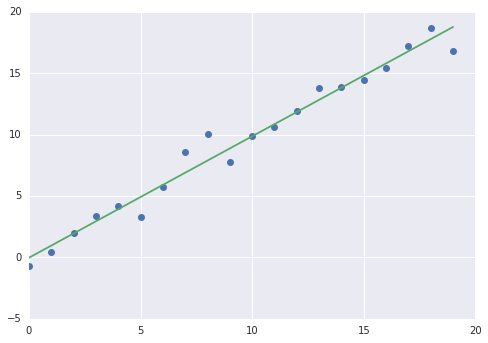

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

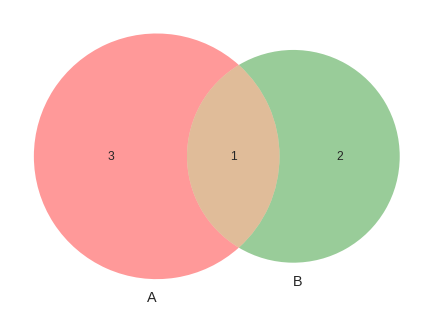

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).